https://www.datacamp.com/tutorial/understanding-logistic-regression-python

Logistic regression is a statistical method for predicting binary classes.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names, skiprows=[0])
pima.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [31]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima['label'] # Target variable

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [38]:
logreg = LogisticRegression(random_state=16,
                            max_iter=1000)

# training the model
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [50]:
y_pred[0:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [41]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.
# In the output, 115 and 42 are actual predictions, and 25 and 10 are incorrect predictions.
cnf_matrix

array([[115,  10],
       [ 25,  42]])

In [53]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8177083333333334


In [46]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



[0.53362197 0.1988309  0.0311566  0.06774991 0.11226541 0.67087157
 0.21755844 0.11053578 0.2093683  0.11480486]


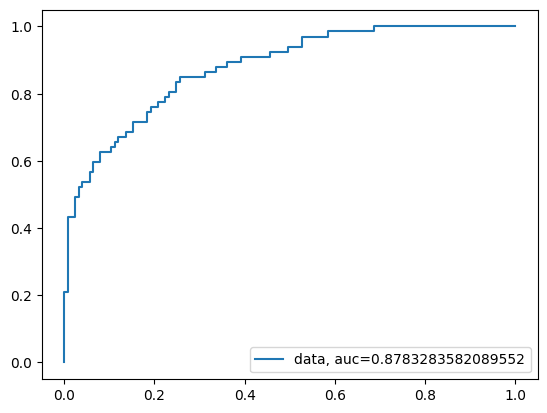

In [52]:
# AUC score for the case is ~0.88.
# AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.
y_pred_proba = logreg.predict_proba(X_test)[::,1]
print(y_pred_proba[0:10])
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()